In this notebook we solve a classical consumption model: the Gale's cake

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
def new_state(i,j):
    """
    This returns the new state, given a consumption u
    """
    return int(i-j)

def utility_function(x,u):
    """
    This is our  utility function
    """
    return 2*(np.sqrt(u))


def initialise_matrices(N_steps, N_states):
    """
    This initialise the utility and the optimal control matrices.
    They have dimension T x X, where T is the number of steps, and X the number of states.
    This means that we will end up having a utility and optimal move for each possible time and state
    
    """
    
    J = np.zeros((N_steps, N_states) ) #Cost 
    J[:]= np.nan
    U = np.zeros((N_steps, N_states) ) #Optimal move
    U[:] = np.nan
    
    return J, U


def states_control_matrices(N_states):
    N_controls = N_states
    
    #
    X = np.linspace(0,1,N_states)
    C = np.linspace(0,1,N_controls)
    
    return X, C
    





def check_constraints(x,u):
    
    """
    This check the constraints of the problems
    """
    
    #Consumption bounded between 0 and current state
    cons_1 = u>=0
    cons_2 = u<=x
    
    if (cons_1 & cons_2):
        return True
    else:
        return False
        

def run_dp(N_steps, N_states, discount=0.1):
    
    """
    Discount is the discount factor
    """
    
    J, U = initialise_matrices(N_steps, N_states)
    X, C = states_control_matrices(N_states)
    N_controls = N_states
    
    for t in reversed(range(N_steps)):
        
        #This is a U x X matrices, defined at each time step. It contains
        #the value of adopting move u at state x
        J_local = initialise_matrices(N_controls, N_states)[0]
        
        for i, x in enumerate(X):
            for j,u in enumerate(C):
                if t == N_steps-1:
                    #If it is last step, consume whatever left (u==x)
                    if i==j:
                
                        J_local[j][i]= utility_function(x,u)
                else:
                    if check_constraints(x,u):
                        J_local[j][i] = utility_function(x,u) + 1/(1+discount)*J[t+1][new_state(i,j)]
                        
        
        print(J_local)
        #print('\n')
        J[t] = np.nanmax(J_local, axis=0) #Maximise along the first dimension, i.e. find max  for given state 
        U[t] = np.nanargmax(J_local, axis=0)
        #print(J)
        #print('----')

        
        
        
        
    return J, U
                        
        
def construct_optimal_trajectory(N_steps, N_states, U): 
    
    U_opt = []
    
    #Initial state: full cake
    i = N_states-1
    
    for t in range(N_steps):
        #print(t)
        U_opt.append(int(U[t][i]))
        i = new_state(i,U[t][i])
        #print(f'New state {i}')
        
    return U_opt
       
    
def translate_index_to_number(A, B):
    
    """
    We are labelling states and controls by indices.
    This function translate a list of indices (e,g. U_opt) to their associated "real numbers" (e.g. index of control -> consumption)
    
    A: list to be transformed
    B: real values

    """
    dim = len(A)
    
    
    return [B[a] for a in A]
        
        
        
                        
                    
            
        
    

In [177]:
N_steps=10
N_states = 5 #This basically fixes the smallest slice of cake we can cosnume, which is 1/N_states 

discount =0.4
k = 1/(1+discount)

X,C = states_control_matrices(N_states)

J,U = run_dp(N_steps,N_states, discount)

U_opt = construct_optimal_trajectory(N_steps, N_states, U)



state_evolution = [N_states-1]
x=N_states-1
for i in range(N_steps):
    x = new_state(x, U_opt[i])
    state_evolution.append(x)

state_evolution = translate_index_to_number(state_evolution, X)    
    
U_opt = [0]+translate_index_to_number(U_opt, C)


cum_U_opt = [0]+np.cumsum(U_opt)


[[0.                nan        nan        nan        nan]
 [       nan 1.                nan        nan        nan]
 [       nan        nan 1.41421356        nan        nan]
 [       nan        nan        nan 1.73205081        nan]
 [       nan        nan        nan        nan 2.        ]]
[[0.         0.71428571 1.01015254 1.23717915 1.42857143]
 [       nan 1.         1.71428571 2.01015254 2.23717915]
 [       nan        nan 1.41421356 2.12849928 2.42436611]
 [       nan        nan        nan 1.73205081 2.44633652]
 [       nan        nan        nan        nan 2.        ]]
[[0.         0.71428571 1.2244898  1.52035663 1.74738323]
 [       nan 1.         1.71428571 2.2244898  2.52035663]
 [       nan        nan 1.41421356 2.12849928 2.63870336]
 [       nan        nan        nan 1.73205081 2.44633652]
 [       nan        nan        nan        nan 2.        ]]
[[0.         0.71428571 1.2244898  1.58892128 1.88478811]
 [       nan 1.         1.71428571 2.2244898  2.58892128]
 [       na

Let us plot some stuff

In [ ]:
[[0.         0.71428571 1.01015254 1.23717915 1.42857143]
 [       nan 1.         1.71428571 2.01015254 2.23717915]
 [       nan        nan 1.41421356 2.12849928 2.42436611]
 [       nan        nan        nan 1.73205081 2.44633652]
 [       nan        nan        nan        nan 2.        ]]

In [202]:
2*np.sqrt(C[a])+k*J[-1][4-1]

2.2371791482634835

In [203]:
b = (1+discount)**2
a = X[4]/(1+b)
a

0.33783783783783783

In [204]:
C-a

array([-0.33783784, -0.08783784,  0.16216216,  0.41216216,  0.66216216])

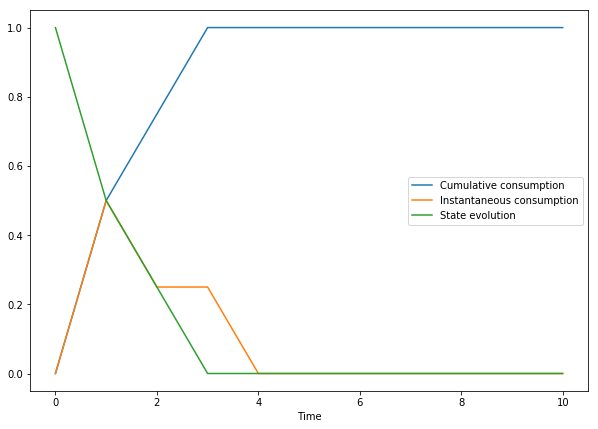

In [173]:
plt.figure(figsize=(10,7))
plt.plot(cum_U_opt, label = 'Cumulative consumption')
plt.plot(U_opt, label = 'Instantaneous consumption')
plt.plot(state_evolution, label = 'State evolution')
plt.xlabel('Time')


plt.legend()

In [120]:
np.round(2*np.sqrt(X) - J[-1], 2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [121]:
np.round(4*np.sqrt(X)*np.sqrt(1/(1+(1/k)**2)) - J[-2], 2)

array([ 0.  ,  0.03, -0.01, -0.02, -0.02, -0.03, -0.03, -0.03, -0.04,
       -0.04, -0.04, -0.04, -0.05, -0.05, -0.05, -0.05, -0.05, -0.05,
       -0.06, -0.06, -0.06, -0.06, -0.06, -0.06, -0.07, -0.07, -0.07,
       -0.07, -0.07, -0.07, -0.07, -0.07, -0.08, -0.08, -0.08, -0.08,
       -0.08, -0.08, -0.08, -0.08, -0.08, -0.09, -0.09, -0.09, -0.09,
       -0.09, -0.09, -0.09, -0.09, -0.09, -0.09, -0.1 , -0.1 , -0.1 ,
       -0.1 , -0.1 , -0.1 , -0.1 , -0.1 , -0.1 , -0.1 , -0.1 , -0.11,
       -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11, -0.11,
       -0.11, -0.11, -0.11, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12,
       -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.12, -0.13, -0.13,
       -0.13, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13,
       -0.13])

In [47]:
L = len(state_evolution[:-1])
[state_evolution[:-1][L-i-1]/(k**i) for i in range(L)]

[0.04040404040404041,
 0.14545454545454545,
 0.4254545454545454,
 1.1192727272727272,
 2.8629818181818183,
 7.062021818181816,
 16.49077527272727,
 38.3410525090909,
 87.93705914181817,
 198.3592903679999]

In [50]:
state_evolution

[1.0,
 0.797979797979798,
 0.6262626262626263,
 0.48484848484848486,
 0.37373737373737376,
 0.27272727272727276,
 0.19191919191919193,
 0.13131313131313133,
 0.08080808080808081,
 0.04040404040404041,
 0.0]

In [49]:
U_opt

[0,
 0.20202020202020204,
 0.17171717171717174,
 0.14141414141414144,
 0.11111111111111112,
 0.10101010101010102,
 0.08080808080808081,
 0.06060606060606061,
 0.05050505050505051,
 0.04040404040404041,
 0.04040404040404041]

Let us analyse the model for different value of the discount factor

In [10]:
U_v = []
dis_v =  np.linspace(0,0.8,10)
for discount in dis_v:
    J_0, U_0 = run_dp(N_steps, N_states,discount)
    U_opt =construct_optimal_trajectory(N_steps, N_states, U_0)
    U_opt = [0]+translate_index_to_number(U_opt, C)
    #U_opt = np.cumsum(U_opt)
    U_v.append(U_opt)    
    

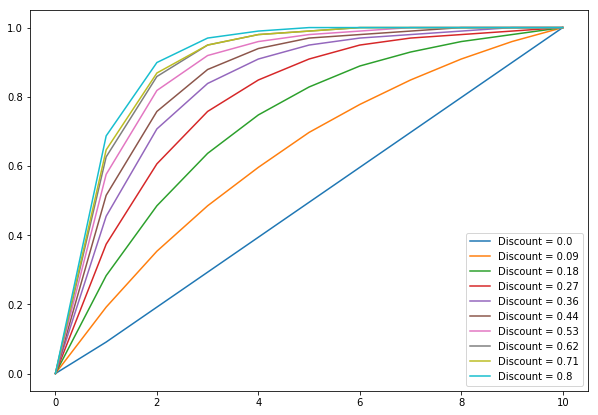

In [11]:
plt.figure(figsize=(10,7))
for i, u in enumerate(U_v):
    plt.plot(np.cumsum(u), label = f'Discount = {np.round(dis_v[i],2)}')
    plt.legend()

We can see that for larger discount factors (agent more impatient), the consumption of the cake tends to be more rapid. 0 discount instead, corresponding to the case where the agents values future consumption as much as current one, gives a straight line, with instantaneous consumption tending to be independent from t

In [89]:
def analytical_solution_consumptions(N_steps, discount, t):
    return (2*discount)/(1-np.exp(-2*discount*(N_steps-1)))*np.exp(-2*discount*t)

In [143]:
def analytical_solution_consumptions(N_steps, discount, t):
    return (1+discount*(N_steps-1))/(N_steps-1)*((1+discount*t)**(-2))

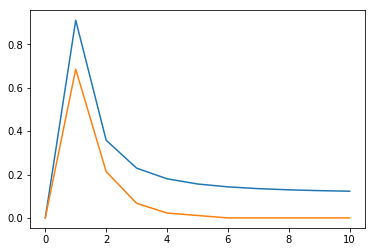

In [147]:
N_steps=10
N_states = 90  #This basically fixes the smallest slice of cake we can cosnume, which is 1/N_states 

discount = 0.8
c = [0]+[analytical_solution_consumptions(N_steps, discount,t) for t in range(0,N_steps)]

###############

X,C = states_control_matrices(N_states)

J,U = run_dp(N_steps,N_states, discount=discount)

d = construct_optimal_trajectory(N_steps, N_states, U)
d= [0]+translate_index_to_number(d, C)

plt.plot(c)
plt.plot(d)



In [145]:
c

[0,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111]

In [146]:
d

[0,
 0.0898876404494382,
 0.10112359550561797,
 0.10112359550561797,
 0.10112359550561797,
 0.10112359550561797,
 0.10112359550561797,
 0.10112359550561797,
 0.10112359550561797,
 0.10112359550561797,
 0.10112359550561797]